## Observations and Insights 

In [151]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_study_df = pd.merge(mouse_metadata, study_results, how="outer", on=["Mouse ID"])
print(mouse_study_df)

mouse_study_df.to_csv("/Users/ellenip/Desktop/Output/mouse_study_df.csv", index=True,)
# Display the data table for preview
mouse_study_df.head()

     Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0        k403     Ramicane  Male          21          16          0   
1        k403     Ramicane  Male          21          16          5   
2        k403     Ramicane  Male          21          16         10   
3        k403     Ramicane  Male          21          16         15   
4        k403     Ramicane  Male          21          16         20   
...       ...          ...   ...         ...         ...        ...   
1888     z969     Naftisol  Male           9          30         25   
1889     z969     Naftisol  Male           9          30         30   
1890     z969     Naftisol  Male           9          30         35   
1891     z969     Naftisol  Male           9          30         40   
1892     z969     Naftisol  Male           9          30         45   

      Tumor Volume (mm3)  Metastatic Sites  
0              45.000000                 0  
1              38.825898                 0  
2           

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [152]:
# Checking the number of mice.
mouse_study_df["Mouse ID"].value_counts()
mouse_study_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [153]:
mouse_study_df.shape

(1893, 8)

In [154]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mouse_study_df[["Mouse ID", "Timepoint"]].duplicated()
mouse_study_df[~mouse_study_df[["Mouse ID", "Timepoint"]].duplicated()]
duplicate_remove = mouse_study_df[~mouse_study_df[["Mouse ID", "Timepoint"]].duplicated()]
duplicate_remove.to_csv("/Users/ellenip/Desktop/Output/duplicate_remove_df.csv", index=False,)

In [155]:
# Optional: Get all the data for the duplicate mouse ID. 
mouse_study_df[mouse_study_df['Mouse ID']=='g989']

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [156]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
duplicate_remove

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [157]:
# Checking the number of mice in the clean DataFrame.
mouse_count = len(duplicate_remove["Mouse ID"].value_counts())
mouse_count

249

## Summary Statistics

In [158]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
regimen_group = duplicate_remove.groupby("Drug Regimen")
mean = round(regimen_group["Tumor Volume (mm3)"].mean(),2)
median = round(regimen_group["Tumor Volume (mm3)"].median(),2)
var = round(regimen_group["Tumor Volume (mm3)"].var(),2)
std = round(regimen_group["Tumor Volume (mm3)"].std(),2)
sem = round(regimen_group["Tumor Volume (mm3)"].sem(),2)

summary_stats_df = pd.DataFrame({"Average" : mean, "Median" : median,
                                "Variance" : var, "Standard Deviation" : std,
                                "Standard Error" : sem})
summary_stats_df

,Average,Median,Variance,Standard Deviation,Standard Error
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.39,50.91,43.14,6.57,0.53
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


## Bar and Pie Charts

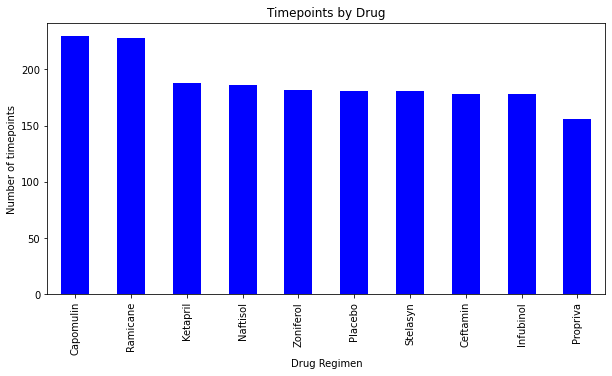

In [159]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
combined_regimen_group = duplicate_remove.groupby("Drug Regimen")

bar_graph_info = combined_regimen_group["Timepoint"].count().sort_values(ascending = False)
bar_graph = bar_graph_info.plot(kind = "bar", color = "blue", figsize = (10,5))
bar_graph.set_title("Timepoints by Drug")
bar_graph.set_xlabel("Drug Regimen")
bar_graph.set_ylabel("Number of timepoints")
plt.show()

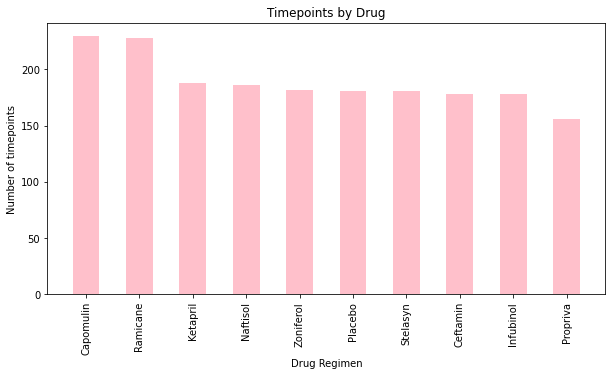

In [160]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
x_axis = np.arange(len(bar_graph_info))
tick_locations = [value for value in x_axis]

plt.figure(figsize = (10,5))
plt.bar(x_axis, bar_graph_info, color="pink", width = .5)
plt.xticks(tick_locations, bar_graph_info.index, rotation="vertical")
plt.title("Timepoints by Drug")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of timepoints")
plt.show()

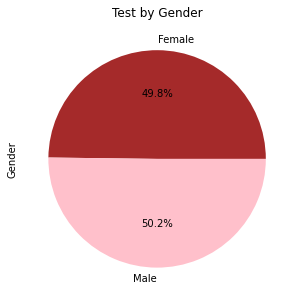

In [161]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
combined_gender_group = duplicate_remove.groupby("Sex")

pie_chart_info = combined_gender_group["Mouse ID"].nunique()
pie_chart = pie_chart_info.plot(kind = "pie", y = pie_chart_info, colors = {"pink", "brown"}, autopct="%1.1f%%", figsize = (5,5))
pie_chart.set_title("Test by Gender")
pie_chart.set_ylabel("Gender")
plt.show()

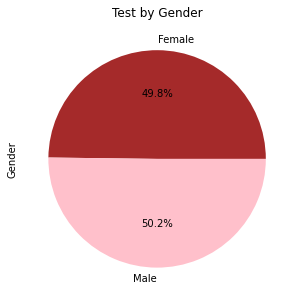

In [162]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
pie_labels = pie_chart_info.index
colors = ["brown", "pink"]
plt.figure(figsize = (5,5))
plt.pie(pie_chart_info, labels = pie_labels, colors=colors, autopct="%1.1f%%")
plt.title("Test by Gender")
plt.ylabel("Gender")
plt.show()

## Quartiles, Outliers and Boxplots

In [163]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
final_tumor_size = duplicate_remove.drop_duplicates(subset = ("Mouse ID"), keep = "last")
final_tumor_drug = final_tumor_size[["Mouse ID", "Drug Regimen", "Tumor Volume (mm3)"]]
final_tumor_size_Capomulin = final_tumor_drug.loc[final_tumor_drug["Drug Regimen"] == "Capomulin"]
final_tumor_size_Ramicane = final_tumor_drug.loc[final_tumor_drug["Drug Regimen"] == "Ramicane"]
final_tumor_size_Infubinol = final_tumor_drug.loc[final_tumor_drug["Drug Regimen"] == "Infubinol"]
final_tumor_size_Ceftamin = final_tumor_drug.loc[final_tumor_drug["Drug Regimen"] == "Ceftamin"]

In [164]:
# Put treatments into a list for for loop (and later for plot labels)
# Create empty list to fill with tumor vol data (for plotting)
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# Locate the rows which contain mice on each drug and get the tumor volumes
# add subset 
# Determine outliers using upper and lower bounds

avg_tumor_size_final = round(box_plot_df.mean(),2)
quartiles = round(box_plot_df.quantile([.25,.5,.75]),2)
lower_q = quartiles.loc[.25]
upper_q = quartiles.loc[.75]
iqr = upper_q - lower_q
lower_bound = lower_q - (1.5*iqr)
upper_bound = upper_q + (1.5*iqr)
outlier_df = pd.DataFrame({"Lower Bound" : lower_bound, "Upper Bound" : upper_bound})

avg_tumor_size_final

Capomulin    36.67
Ramicane     36.19
Infubinol    58.18
Ceftamin     57.75
dtype: float64

In [165]:
quartiles

,Capomulin,Ramicane,Infubinol,Ceftamin
0.25,32.38,31.56,54.05,48.72
0.50,38.13,36.56,60.17,59.85
0.75,40.16,40.66,65.53,64.30


In [166]:
outlier_df

,Lower Bound,Upper Bound
Capomulin,20.71,51.83
Ramicane,17.91,54.31
Infubinol,36.83,82.75
Ceftamin,25.35,87.67


In [167]:
Capomulin_outlier = final_tumor_size_Capomulin.loc[(final_tumor_size_Capomulin["Tumor Volume (mm3)"] <= outlier_df.loc["Capomulin", "Lower Bound"]) |
                                                   (final_tumor_size_Capomulin["Tumor Volume (mm3)"] >= outlier_df.loc["Capomulin", "Upper Bound"])]
Ramicane_outlier = final_tumor_size_Ramicane.loc[(final_tumor_size_Ramicane["Tumor Volume (mm3)"] <= outlier_df.loc["Ramicane", "Lower Bound"]) |
                                                   (final_tumor_size_Ramicane["Tumor Volume (mm3)"] >= outlier_df.loc["Ramicane", "Upper Bound"])]
Infubinol_outlier = final_tumor_size_Infubinol.loc[(final_tumor_size_Infubinol["Tumor Volume (mm3)"] <= outlier_df.loc["Infubinol", "Lower Bound"]) |
                                                   (final_tumor_size_Infubinol["Tumor Volume (mm3)"] >= outlier_df.loc["Infubinol", "Upper Bound"])]
Ceftamin_outlier = final_tumor_size_Ceftamin.loc[(final_tumor_size_Ceftamin["Tumor Volume (mm3)"] <= outlier_df.loc["Ceftamin", "Lower Bound"]) |
                                                   (final_tumor_size_Ceftamin["Tumor Volume (mm3)"] >= outlier_df.loc["Ceftamin", "Upper Bound"])]

outlier_list = pd.concat([Capomulin_outlier, Ramicane_outlier, Infubinol_outlier, Ceftamin_outlier])
outlier_list

,Mouse ID,Drug Regimen,Tumor Volume (mm3)
669,c326,Infubinol,36.321346


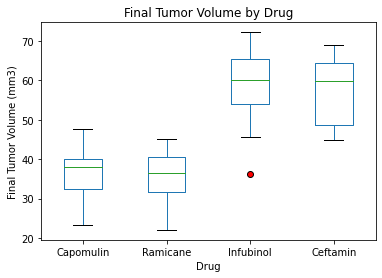

In [168]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
box_plot_df = pd.DataFrame({"Capomulin" : final_tumor_size_Capomulin["Tumor Volume (mm3)"],
                            "Ramicane" : final_tumor_size_Ramicane["Tumor Volume (mm3)"],
                           "Infubinol" : final_tumor_size_Infubinol["Tumor Volume (mm3)"],
                        "Ceftamin" : final_tumor_size_Ceftamin["Tumor Volume (mm3)"]})

red_circle = dict(markerfacecolor = "red", marker = "o")
fig, myboxplot = plt.subplots()
myboxplot = box_plot_df.boxplot(column = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"], grid = False,
                                flierprops = red_circle,)
plt.title("Final Tumor Volume by Drug")
plt.xlabel("Drug")
plt.ylabel("Final Tumor Volume (mm3)")
plt.show()

In [169]:
Capomulin_tests = duplicate_remove.loc[duplicate_remove["Drug Regimen"] == "Capomulin"]
Potential_Mouse = Capomulin_tests[["Mouse ID"]].drop_duplicates(subset = "Mouse ID", keep = "last")
Potential_Mouse

,Mouse ID
19,s185
29,x401
39,m601
64,f966
104,u364
124,y793
134,r554
144,m957
164,t565
204,i738


## Line and Scatter Plots

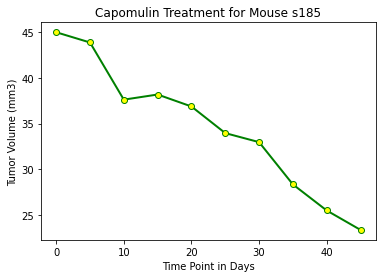

In [170]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
cap_mouse = duplicate_remove.loc[duplicate_remove["Mouse ID"] == "s185"]
x_timepoint = cap_mouse["Timepoint"]
y_tumor_volume = cap_mouse["Tumor Volume (mm3)"]
plt.plot(x_timepoint, y_tumor_volume, color = "green", marker = "o", markerfacecolor = "yellow", linewidth = 2)
plt.title(f"Capomulin Treatment for Mouse s185")
plt.xlabel("Time Point in Days")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

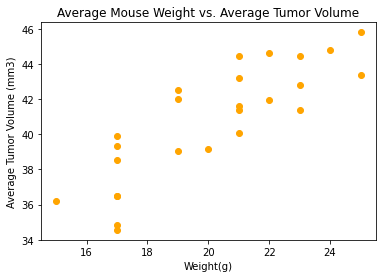

In [171]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
Capomulin_regimen_avgs = Capomulin_tests.groupby("Mouse ID").mean()
avg_weight = Capomulin_regimen_avgs["Weight (g)"]
avg_tumor_volume = Capomulin_regimen_avgs["Tumor Volume (mm3)"]
plt.scatter(avg_weight, avg_tumor_volume, facecolor = "orange")
plt.title("Average Mouse Weight vs. Average Tumor Volume")
plt.xlabel("Weight(g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

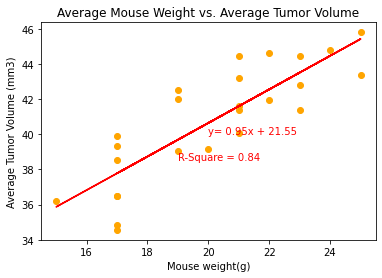

In [172]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
slope, y_int, r_value, p_value, std_err = st.linregress(avg_weight, avg_tumor_volume)

fit = avg_weight * slope  + y_int
equation = "y= " + str(round(slope,2)) + "x + " + str(round(y_int,2))
r_square = "R-Square = " + str(round(r_value,2))
plt.scatter(avg_weight, avg_tumor_volume, facecolor = "orange")
plt.plot(avg_weight, fit, color = "red")
plt.annotate(equation, (20, 40), color = "red", fontsize = 10)
plt.annotate(r_square, (19, 38.5), color = "red", fontsize = 10)
plt.title("Average Mouse Weight vs. Average Tumor Volume")
plt.xlabel("Mouse weight(g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()